# Departamentos en Venta en CABA 2020

Para este análisis descriptivo se utilizara el siguiente dataset: https://data.buenosaires.gob.ar/dataset/departamentos-venta<br>
El mismo posee información de los departamentos en venta en Ciudad de Buenos Aires en el año 2020

### **Objetivo**:
- Realizar una limpieza a los datos.
- Explorar cuales son las características de los departamentos en venta y sus precios.
- Visualizar las relaciones entre las distintas variables del dataset

### **Variables del Dataset:**
<br>
 Dirección: Dirección de la propiedad<br>
 PropiedadS:(No se encontró información acerca del valor que corresponde esta variable) <br>
 Dolares: Valor en dólares de la propiedad<br>
 Pesos: Valor en pesos de la propiedad<br>
 DolaresM2: Valor en dolares del metro cuadrado<br>
 PesosM2: Valor en pesos del metro cuadrado<br>
 Ambientes: Cantidad de ambientes<br>
 Cotizacion: (No se encontró información acerca del valor que corresponde esta variable)<br>
 Trimestre: Trimestre en el que la propiedad se puso a la venta<br>
 Barrio: Barrio al que pertenece la propiedad<br>
 Comunas: Comuna a la que pertenece la propiedad.
<br>

  Nota: Se decide no utilizar las columnas PropiedadS y Cotización ya que no se encontró información sobre las mismas.

**Temas abarcados:** Análisis exploratorio con Pandas. Visualización con Seaborn



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("departamentos-en-venta-2020.csv")
data_df.head()

,Direccion,PropiedadS,Dolares,Pesos,DolaresM2,PesosM2,Ambientes,Cotizacion,Trimestre,Barrio,Comunas
0,Pje Cnel J F Bogado 4561,17,54900,3513600,3229,206682,1,64,SEGUNDO,ALMAGRO,5
1,BOGADO 4500,18,53000,3392000,2944,188444,1,64,SEGUNDO,ALMAGRO,5
2,Pte H Yrigoyen 3381,25,45000,2880000,2500,160000,1,64,SEGUNDO,ALMAGRO,5
3,PASAJE BOGADO 4500,18,41000,2624000,2278,145778,1,64,SEGUNDO,ALMAGRO,5
4,Estado de Palestina 500,18,58900,3769600,3272,209422,1,64,SEGUNDO,ALMAGRO,5


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156258 entries, 0 to 156257
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Direccion   156258 non-null  object
 1   PropiedadS  156258 non-null  int64 
 2   Dolares     156258 non-null  int64 
 3   Pesos       156258 non-null  int64 
 4   DolaresM2   156258 non-null  int64 
 5   PesosM2     156258 non-null  int64 
 6   Ambientes   156258 non-null  int64 
 7   Cotizacion  156258 non-null  int64 
 8   Trimestre   156258 non-null  object
 9   Barrio      156248 non-null  object
 10  Comunas     156258 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 13.1+ MB


In [4]:
data_df.describe()

,PropiedadS,Dolares,Pesos,DolaresM2,PesosM2,Ambientes,Cotizacion,Comunas
count,156258.000000,1.562580e+05,1.562580e+05,156258.000000,1.562580e+05,156258.000000,156258.000000,156258.000000
mean,74.179652,2.139471e+05,1.438505e+07,2913.109473,1.951831e+05,2.536337,67.200009,8.665912
std,85.214643,2.387804e+05,1.636017e+07,1077.613671,7.260647e+04,1.114281,3.558606,4.849992
min,11.000000,7.200000e+03,4.392000e+05,147.000000,9.205000e+03,-7.000000,61.000000,0.000000
25%,41.000000,1.070000e+05,7.089000e+06,2250.000000,1.506300e+05,2.000000,64.000000,4.000000
50%,58.000000,1.500000e+05,1.007750e+07,2757.000000,1.845420e+05,2.000000,67.000000,10.000000
75%,85.000000,2.350000e+05,1.593600e+07,3375.000000,2.254550e+05,3.000000,70.000000,13.000000
max,17180.000000,1.700000e+07,1.088000e+09,72917.000000,4.721354e+06,8.000000,82.000000,15.000000


## Limpieza de Datos

In [5]:
data_df.isna().sum()

Direccion      0
PropiedadS     0
Dolares        0
Pesos          0
DolaresM2      0
PesosM2        0
Ambientes      0
Cotizacion     0
Trimestre      0
Barrio        10
Comunas        0
dtype: int64

In [6]:
data_df.dropna(inplace=True)

In [7]:
data_df.drop_duplicates(inplace=True)

### Barrio

In [8]:
data_df['Barrio'].unique()

array(['ALMAGRO', 'CABALLITO', 'RECOLETA', 'VILLA CRESPO', 'BALVANERA',
       'CONSTITUCION', 'PARQUE PATRICIOS', 'SAN CRISTOBAL', 'MONTSERRAT',
       'SAN NICOLAS', 'BOEDO', 'RETIRO', 'SAN TELMO', 'BELGRANO',
       'COGHLAN', 'NUÑEZ', 'COLEGIALES', 'SAAVEDRA', 'PALERMO',
       'AGRONOMIA', 'VILLA PUEYRREDON', 'CHACARITA', 'PARQUE CHACABUCO',
       'FLORES NORTE', 'PARQUE CHAS', 'PATERNAL', 'VILLA DEL PARQUE',
       'VILLA DEVOTO NORTE', 'VILLA DEVOTO SUR', 'VILLA ORTUZAR',
       'VILLA URQUIZA', 'BOCA', 'BARRACAS ESTE', 'FLORES SUR', 'FLORESTA',
       'VILLA SANTA RITA', 'LINIERS', 'MATADEROS', 'MONTE CASTRO',
       'NUEVA POMPEYA', 'VELEZ SARSFIELD', 'VERSALLES',
       'VILLA GRAL. MITRE', 'VILLA LURO', 'VILLA REAL',
       'PARQUE AVELLANEDA', 'VILLA LUGANO', 'BARRACAS OESTE',
       'PUERTO MADERO', 'VILLA RIACHUELO', 'VILLA SOLDATI', 'NU?æEZ'],
      dtype=object)

In [9]:
data_df.loc[data_df['Barrio'] == 'NU?æEZ'] = 'NUÑEZ'

### Ambientes

In [10]:
data_df['Ambientes'].unique()

array([1, 2, 3, 4, -7, 5, 7, 6, 8, 'NUÑEZ', 0], dtype=object)

In [11]:
data_df.drop(data_df[data_df['Ambientes'] == -7].index, inplace=True)
data_df.drop(data_df[data_df['Ambientes'] == 0].index, inplace=True)
data_df.drop(data_df[data_df['Ambientes'] == 'NUÑEZ'].index, inplace=True)

In [12]:
data_df['Ambientes'].unique()

array([1, 2, 3, 4, 5, 7, 6, 8], dtype=object)

### Trimestre

In [13]:
data_df['Trimestre'].unique()

array(['SEGUNDO', 'PRIMER', 'TERCER', 'CUARTO'], dtype=object)

In [14]:
data_df['Trimestre'].value_counts()

SEGUNDO    135718
PRIMER      11917
TERCER       3150
CUARTO       2697
Name: Trimestre, dtype: int64

### Comunas

In [15]:
data_df['Comunas'].unique()

array([5, 6, 2, 15, 3, 1, 4, 13, 12, 14, 7, 11, 10, 9, 8], dtype=object)

### Elimino columnas innecesarias 

In [16]:
to_drop = ['Direccion','PropiedadS','Cotizacion']

In [17]:
data_df.drop(to_drop, axis=1, inplace=True)

In [18]:
data_df = data_df.reindex(columns=['Barrio','Comunas','Ambientes','Trimestre','Pesos','Dolares','PesosM2', 'DolaresM2'])

### Exporto el dataset limpio

In [19]:
ruta = 'C:/Users/Tamara/Documents/DATA ANALYTICS/Proyectos/Departamentos en Venta/departamentos-en-venta-2020-clean.csv'

data_df.to_csv(ruta, index=False)

In [20]:
data = pd.read_csv("departamentos-en-venta-2020-clean.csv")
data.head()

,Barrio,Comunas,Ambientes,Trimestre,Pesos,Dolares,PesosM2,DolaresM2
0,ALMAGRO,5,1,SEGUNDO,3513600,54900,206682,3229
1,ALMAGRO,5,1,SEGUNDO,3392000,53000,188444,2944
2,ALMAGRO,5,1,SEGUNDO,2880000,45000,160000,2500
3,ALMAGRO,5,1,SEGUNDO,2624000,41000,145778,2278
4,ALMAGRO,5,1,SEGUNDO,3769600,58900,209422,3272


## Distribución de frecuencias

### Barrio

- Cantidad de departamentos por barrio

In [21]:
data['Barrio'].value_counts()

PALERMO               21662
CABALLITO             11343
BELGRANO              11171
RECOLETA              11125
ALMAGRO                8471
BALVANERA              7823
VILLA CRESPO           7091
VILLA URQUIZA          6417
FLORES NORTE           6076
COLEGIALES             3814
SAAVEDRA               3597
SAN NICOLAS            3313
LINIERS                2782
MONTSERRAT             2743
PARQUE CHACABUCO       2678
RETIRO                 2640
CONSTITUCION           2479
SAN CRISTOBAL          2303
BARRACAS ESTE          2179
VILLA LURO             1958
VILLA DEL PARQUE       1954
SAN TELMO              1798
NUÑEZ                  1754
CHACARITA              1698
VILLA DEVOTO NORTE     1633
MONTE CASTRO           1623
BOEDO                  1594
PUERTO MADERO          1497
FLORESTA               1371
VILLA SANTA RITA       1358
COGHLAN                1349
VILLA ORTUZAR          1326
VELEZ SARSFIELD        1308
VILLA GRAL. MITRE      1277
VILLA PUEYRREDON       1253
MATADEROS           

- Porcentaje de cantidad de departamentos por barrio

In [64]:
data['Barrio'].value_counts(normalize=True)*100

PALERMO               14.113707
CABALLITO              7.390443
BELGRANO               7.278378
RECOLETA               7.248407
ALMAGRO                5.519214
BALVANERA              5.097015
VILLA CRESPO           4.620086
VILLA URQUIZA          4.180946
FLORES NORTE           3.958770
COLEGIALES             2.484982
SAAVEDRA               2.343597
SAN NICOLAS            2.158559
LINIERS                1.812590
MONTSERRAT             1.787180
PARQUE CHACABUCO       1.744830
RETIRO                 1.720071
CONSTITUCION           1.615173
SAN CRISTOBAL          1.500502
BARRACAS ESTE          1.419710
VILLA LURO             1.275720
VILLA DEL PARQUE       1.273113
SAN TELMO              1.171473
NUÑEZ                  1.142805
CHACARITA              1.106319
VILLA DEVOTO NORTE     1.063968
MONTE CASTRO           1.057453
BOEDO                  1.038558
PUERTO MADERO          0.975359
FLORESTA               0.893264
VILLA SANTA RITA       0.884794
COGHLAN                0.878930
VILLA OR

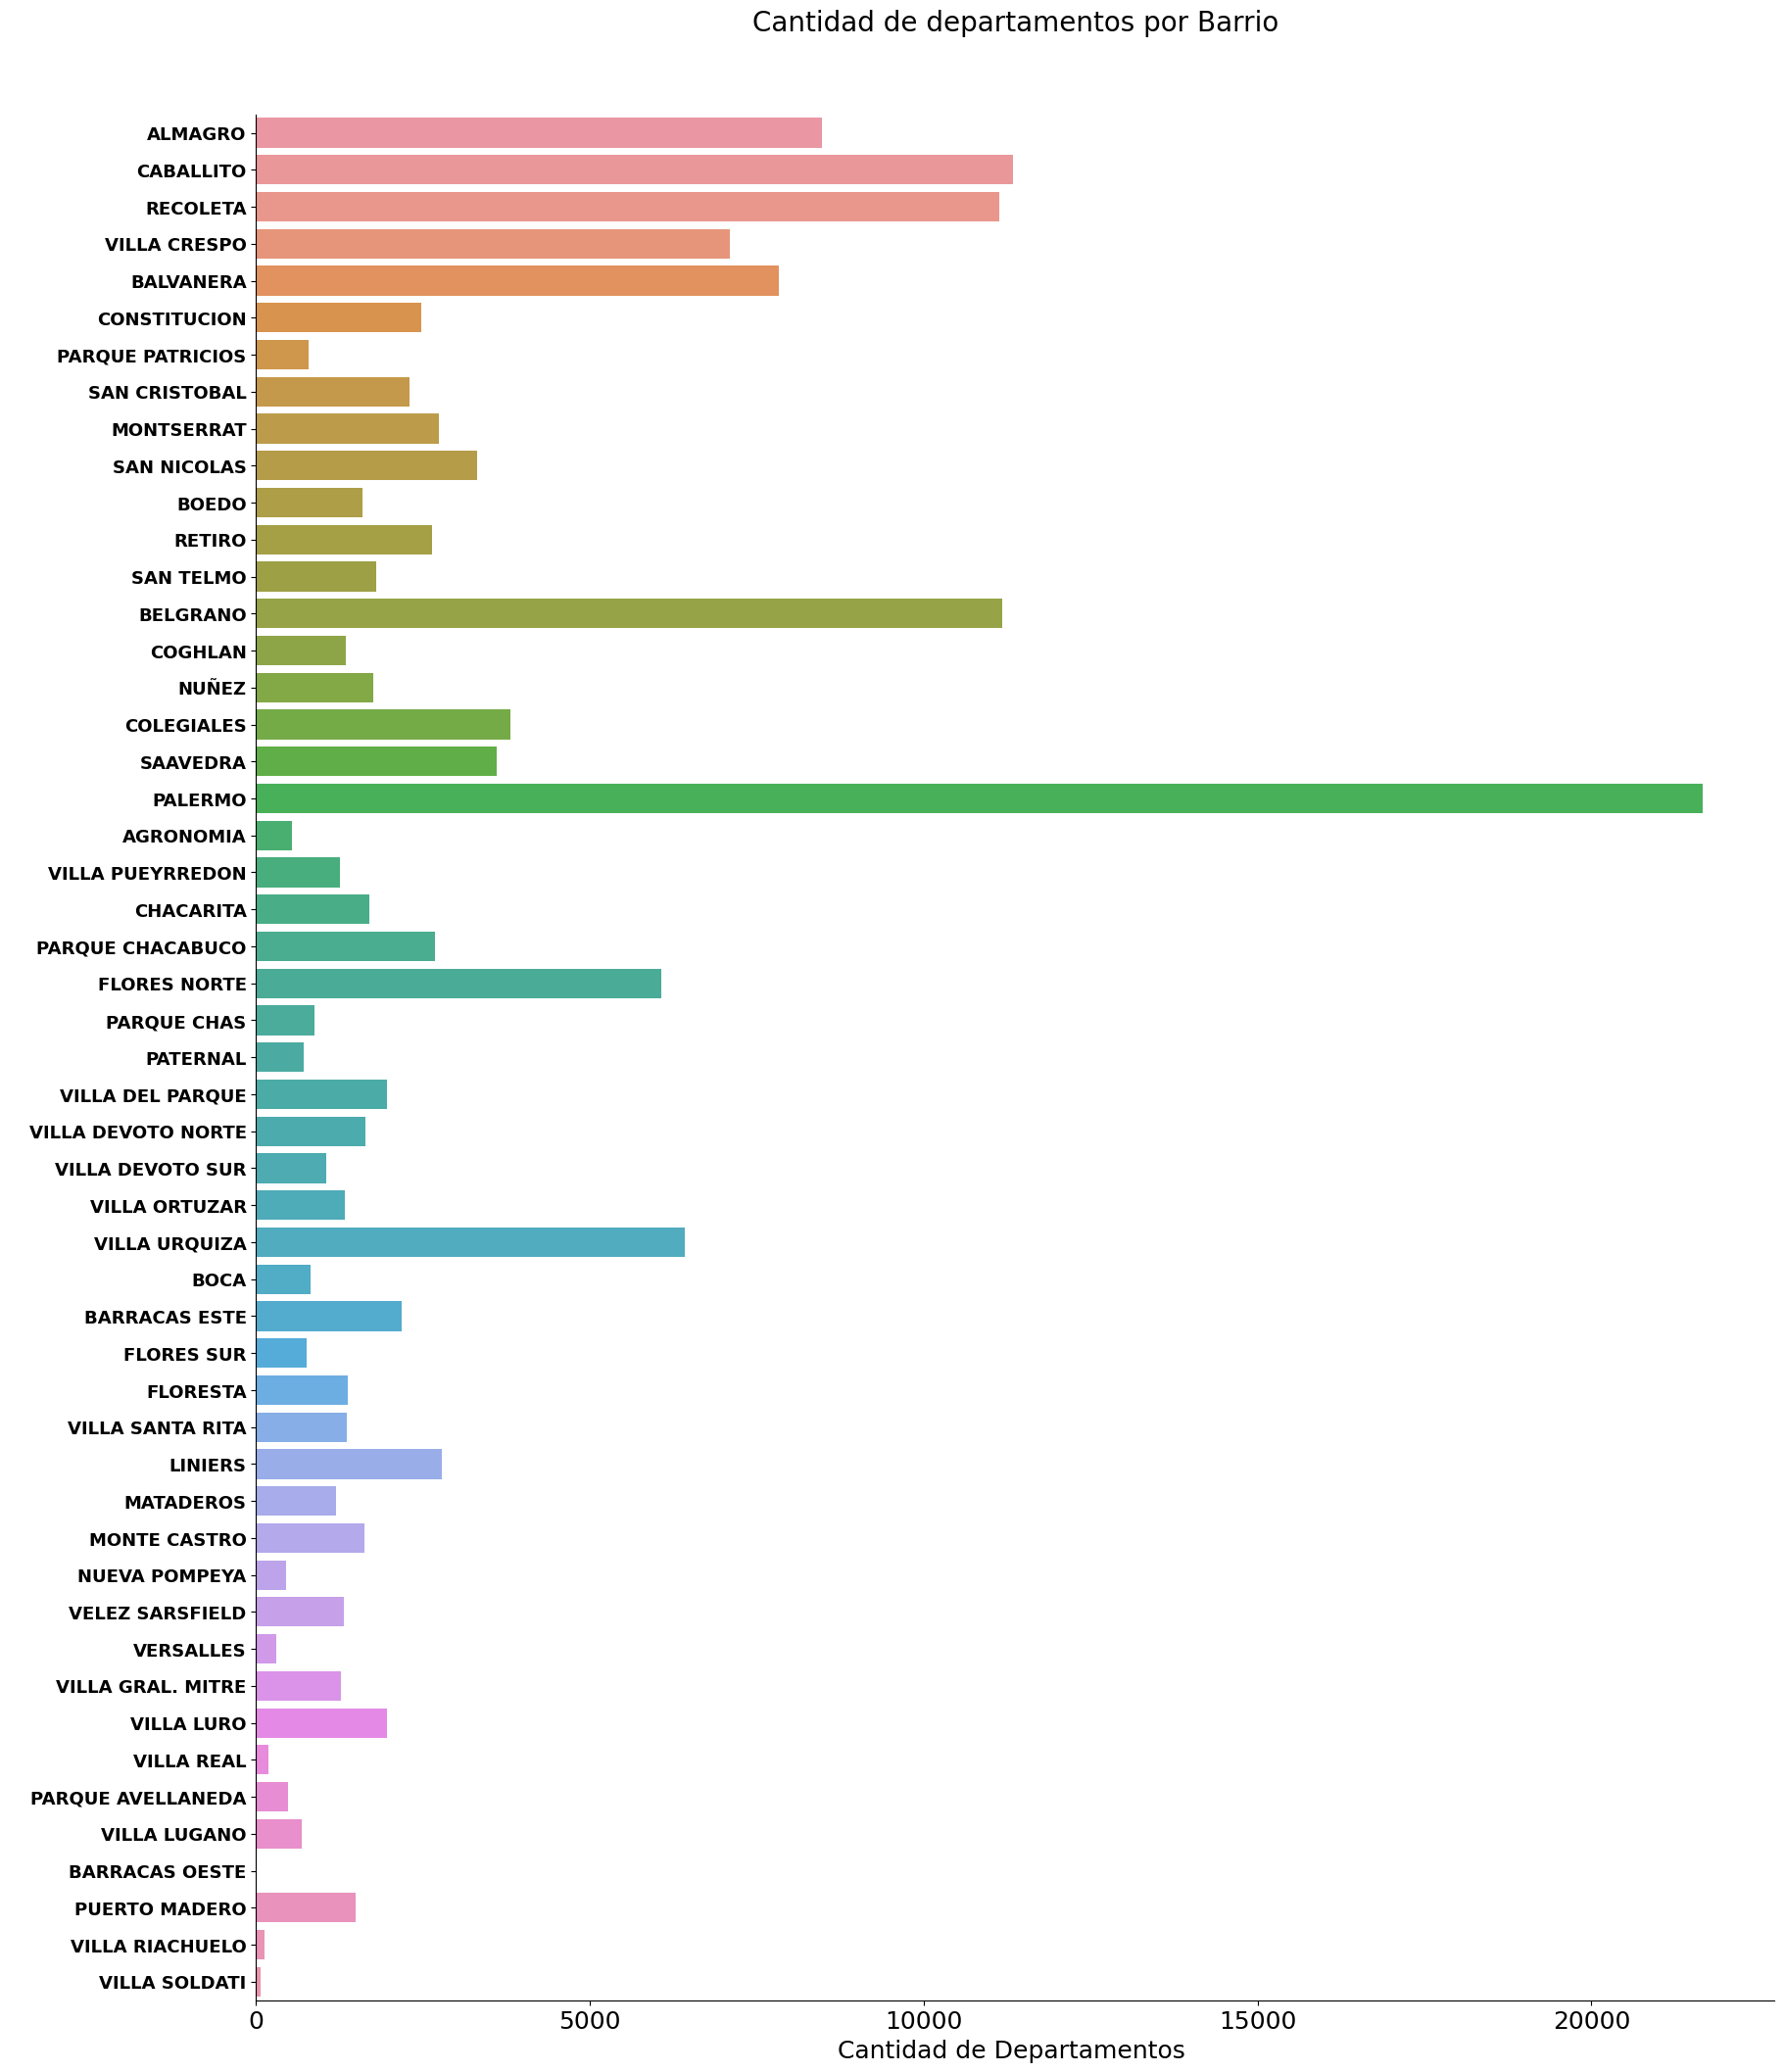

In [25]:
plt.figure(figsize=(20,25))

sns.countplot(
    y = 'Barrio',
    data = data,
    )


plt.title('Cantidad de departamentos por Barrio', y=1.04, fontdict={'size':20})
plt.ylabel(' ')
plt.yticks(fontsize=13, weight='bold')
plt.xlabel('Cantidad de Departamentos ' , fontdict={'size':18})
plt.xticks(fontsize=18)


sns.despine()
plt.show()

## Observaciones:
- Podemos ver que el barrio con mayor cantidad de departamentos en venta es Palermo, seguido de Caballito, Belgrano y Recoleta.
- El barrio de Palermo tiene 21.662 departamentos en venta (14%)
- Barrios como Barracas Oeste, Villa Soldati y Villa Riachuelo poseen la menor cantidad de unidades a la venta. 
- El barrio de Barracas Oeste tiene solo 4 departamentos a la venta (0,002%)

### Comunas

- Cantidad de departamentos por comuna

In [26]:
data['Comunas'].value_counts()

14    21662
13    16739
1     14470
12    12616
15    12242
6     11343
2     11125
3     10126
5     10065
7      9509
11     7279
10     6738
9      4468
4      4229
8       871
Name: Comunas, dtype: int64

- Porcentaje de cantidad de departamentos por comuna

In [65]:
data['Comunas'].value_counts(normalize=True)*100

14    14.113707
13    10.906165
1      9.427816
12     8.219856
15     7.976180
6      7.390443
2      7.248407
3      6.597516
5      6.557772
7      6.195515
11     4.742576
10     4.390091
9      2.911091
4      2.755372
8      0.567493
Name: Comunas, dtype: float64

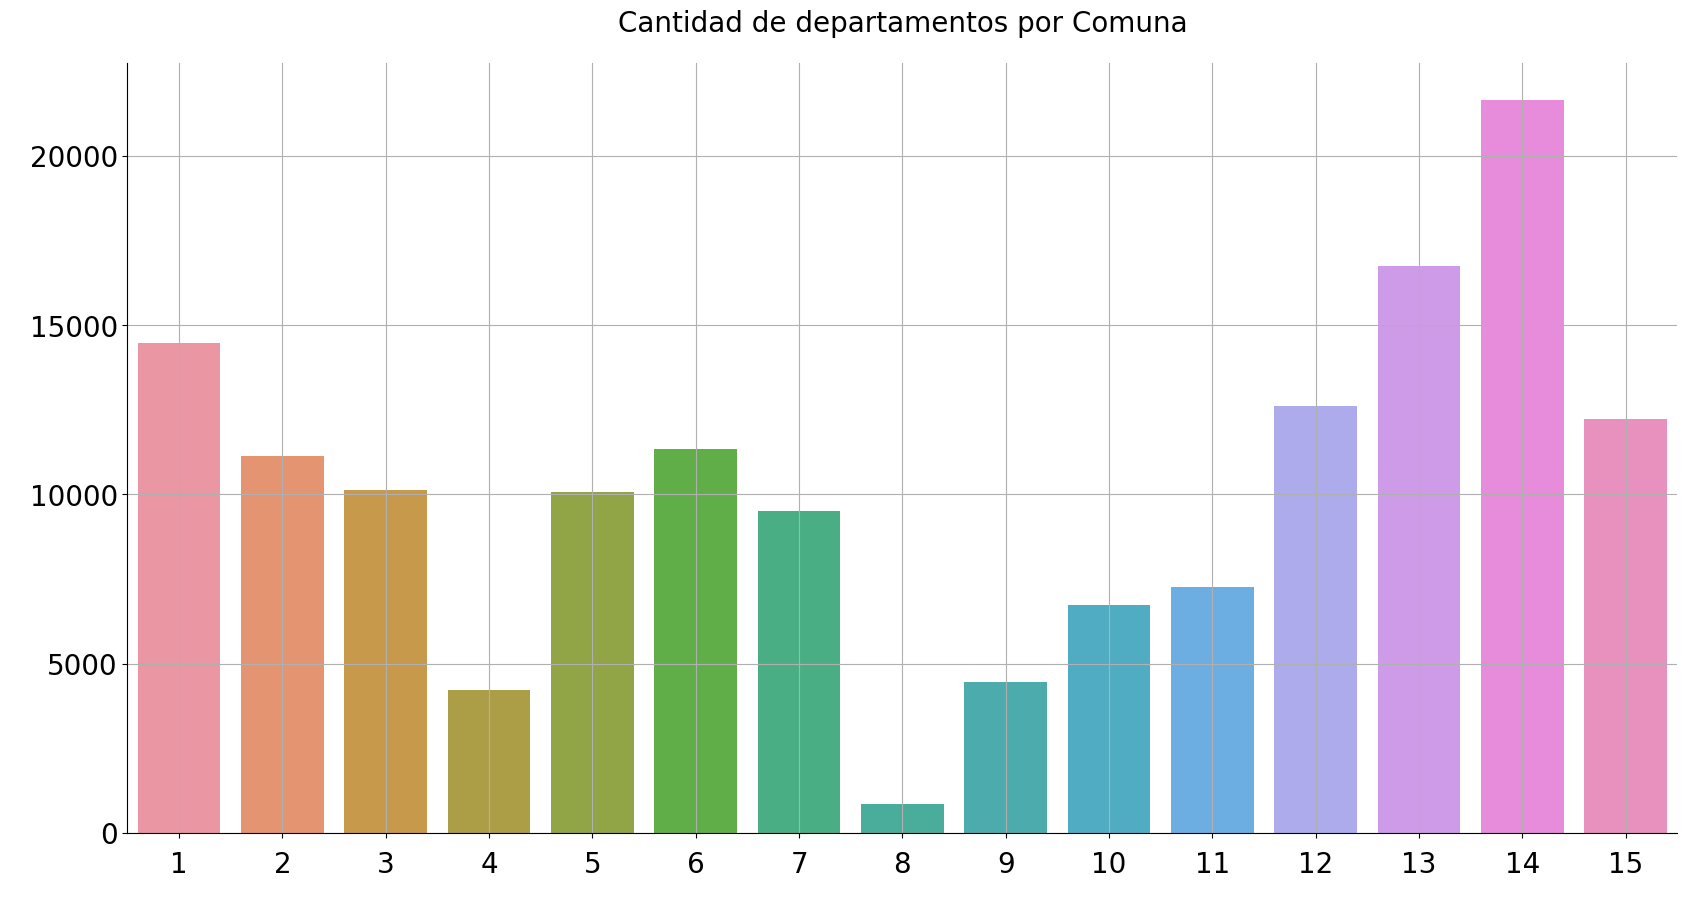

In [30]:
plt.figure(figsize=(20,10))

sns.countplot(x = 'Comunas',
           data = data)


plt.title('Cantidad de departamentos por Comuna', y=1.03, fontdict={'size':20})
plt.xlabel(' ')
plt.xticks(fontsize=20, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.grid()
plt.show()

## Observaciones:
- La comuna 14 (que corresponde al barrio de Palermo) tiene mayor cantidad  de departamentos en venta,  21.662 unidades.
- Le sigue la comuna 13 la cual esta integrada por los barrios de Núñez, Belgrano y Colegiales con 16.739 departamentos a la venta (10%)
- En tercer lugar la comuna 1 integrada por los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución con 14.470 (9,42%)

### Ambientes

- Cantidad de departamentos por número de de ambientes 

In [66]:
data['Ambientes'].value_counts()

2    50384
3    43164
1    29232
4    24824
5     4791
6      809
7      236
8       42
Name: Ambientes, dtype: int64

- Porcentaje de cantidad de departamentos por número de de ambientes 

In [67]:
data['Ambientes'].value_counts(normalize=True)*100 

2    32.827302
3    28.123168
1    19.045882
4    16.173884
5     3.121539
6     0.527098
7     0.153764
8     0.027365
Name: Ambientes, dtype: float64

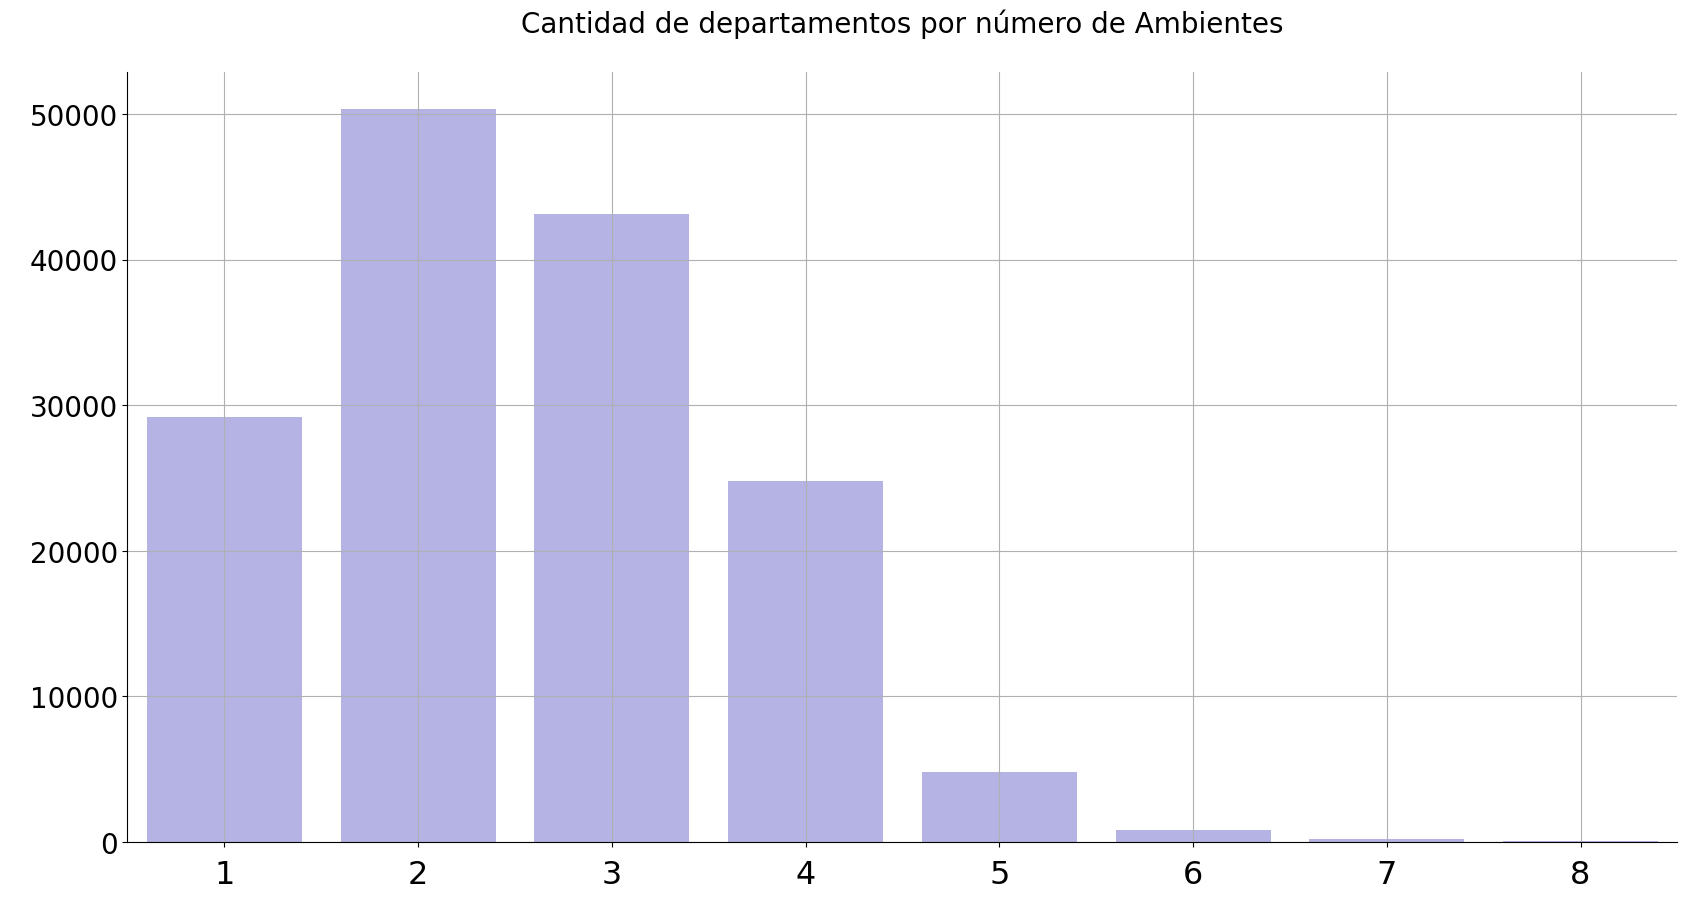

In [35]:
plt.figure(figsize=(20,10))
colores = [ '#ADABEB']

sns.countplot(data=data, 
              x = 'Ambientes',
              palette = colores)


plt.title('Cantidad de departamentos por número de Ambientes', y=1.04, fontdict={'size':20})
plt.xlabel(' ')
plt.xticks(fontsize=23, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.grid()
plt.show()

## Observaciones:

- Hay mayor cantidad de departamentos con 2 y 3 ambientes
- Hay 50.384 departamentos con 2 ambientes (32,8%)
- Hay 43.164 departamentos con 3 ambientes (28,1%)
- Hay solo 42 departamentos con 8 ambientes (0,02%)


### Trimestre

- Cantidad de departamentos por trimestre

In [36]:
data['Trimestre'].value_counts()

SEGUNDO    135718
PRIMER      11917
TERCER       3150
CUARTO       2697
Name: Trimestre, dtype: int64

- Porcentaje de cantidad de departamentos por trimestre

In [69]:
data['Trimestre'].value_counts(normalize=True)*100 

SEGUNDO    88.426004
PRIMER      7.764428
TERCER      2.052358
CUARTO      1.757209
Name: Trimestre, dtype: float64

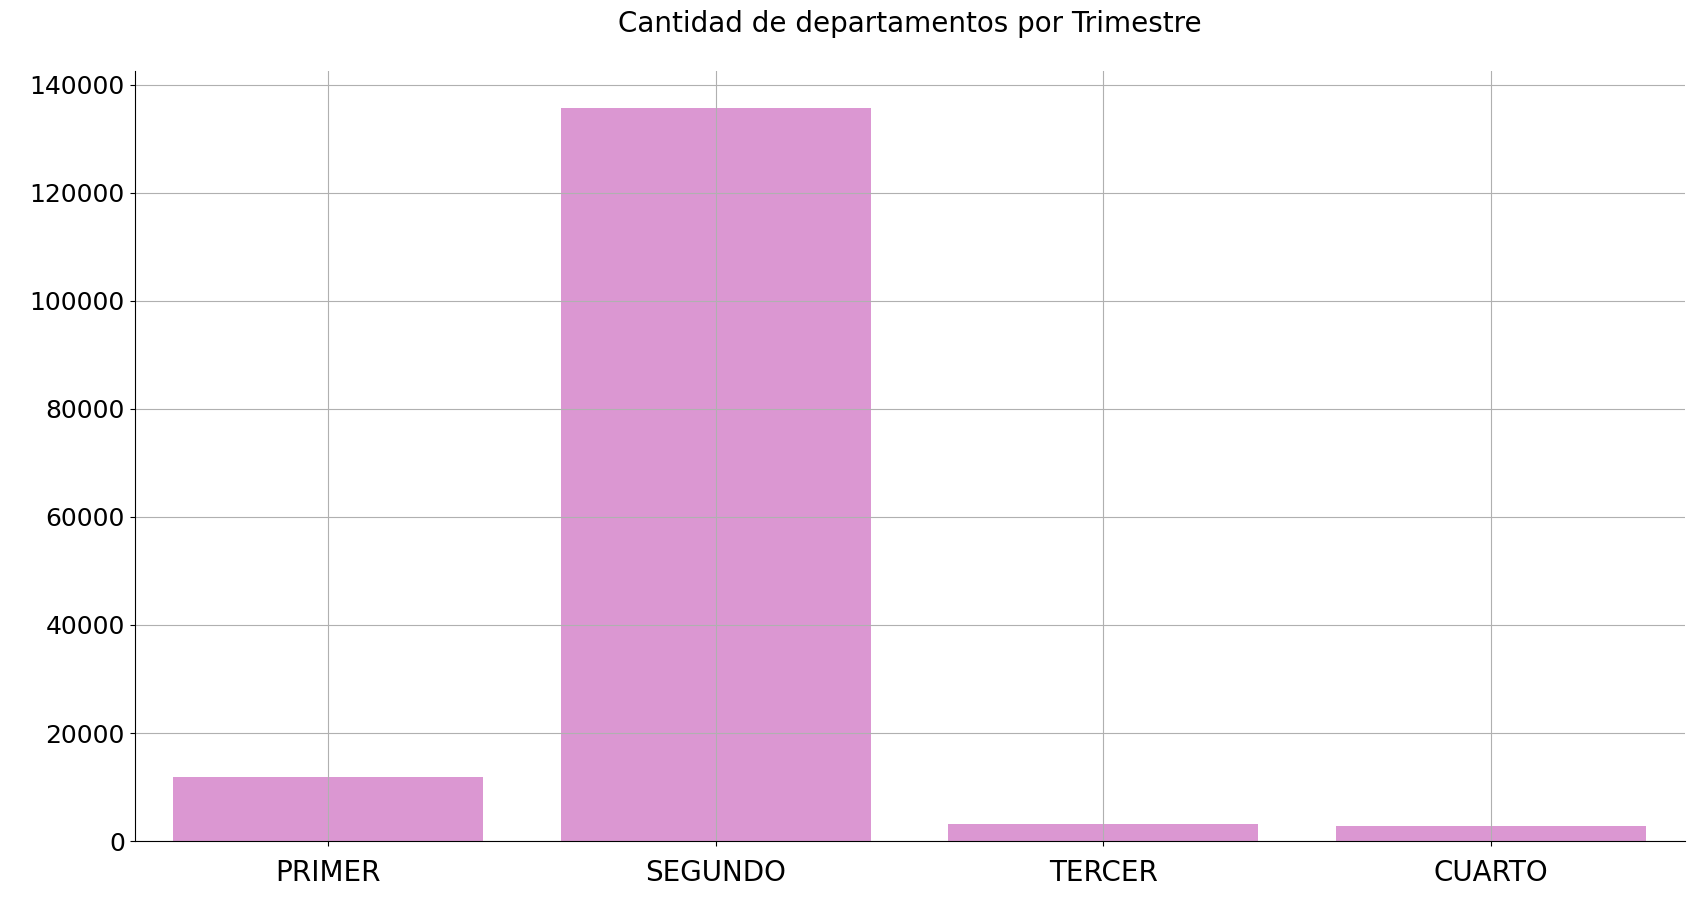

In [40]:
plt.figure(figsize=(20,10))
orden = ['PRIMER', 'SEGUNDO', 'TERCER', 'CUARTO']
colores = [ '#E78BDB' ]


sns.countplot(x = 'Trimestre',
           data = data,
          palette = colores,
          order = orden)

plt.title('Cantidad de departamentos por Trimestre', y=1.04, fontdict={'size':20})
plt.xlabel(' ')
plt.xticks(fontsize=20, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=18)

sns.despine()
plt.grid()
plt.show()

## Observaciones:

- La mayor concentración de departamentos (135.718 unidades) es durante el segundo trimestre que representa el 88%
- La menor cantidad de departamentos a la venta fue durante el cuarto trimestre con 2.697 unidades (1,75%)

## Variables Numéricas

### Reagrupo los valores de las variables en intervalos: 

### Pesos

In [41]:
len(data['Pesos'].unique())

25530

In [42]:
data_intervalos = data.copy(deep=True)

In [43]:
data_intervalos.loc[:, 'Rango_Pesos'] = '<5M'
data_intervalos.loc[(data_intervalos['Pesos']>= 5000000) & (data_intervalos['Pesos'] < 10000000), 'Rango_Pesos'] = '5M - 10M'
data_intervalos.loc[(data_intervalos['Pesos']>= 10000000) & (data_intervalos['Pesos'] < 20000000), 'Rango_Pesos'] = '10M - 20M'
data_intervalos.loc[(data_intervalos['Pesos']>= 20000000) & (data_intervalos['Pesos'] < 50000000), 'Rango_Pesos'] = '20M - 50M'
data_intervalos.loc[(data_intervalos['Pesos']>= 50000000) & (data_intervalos['Pesos'] < 100000000), 'Rango_Pesos'] = '50M - 100M'
data_intervalos.loc[(data_intervalos['Pesos']> 100000000), 'Rango_Pesos'] = '>100M'


In [44]:
data_intervalos['Rango_Pesos'].unique()

array(['<5M', '5M - 10M', '10M - 20M', '20M - 50M', '50M - 100M', '>100M'],
      dtype=object)

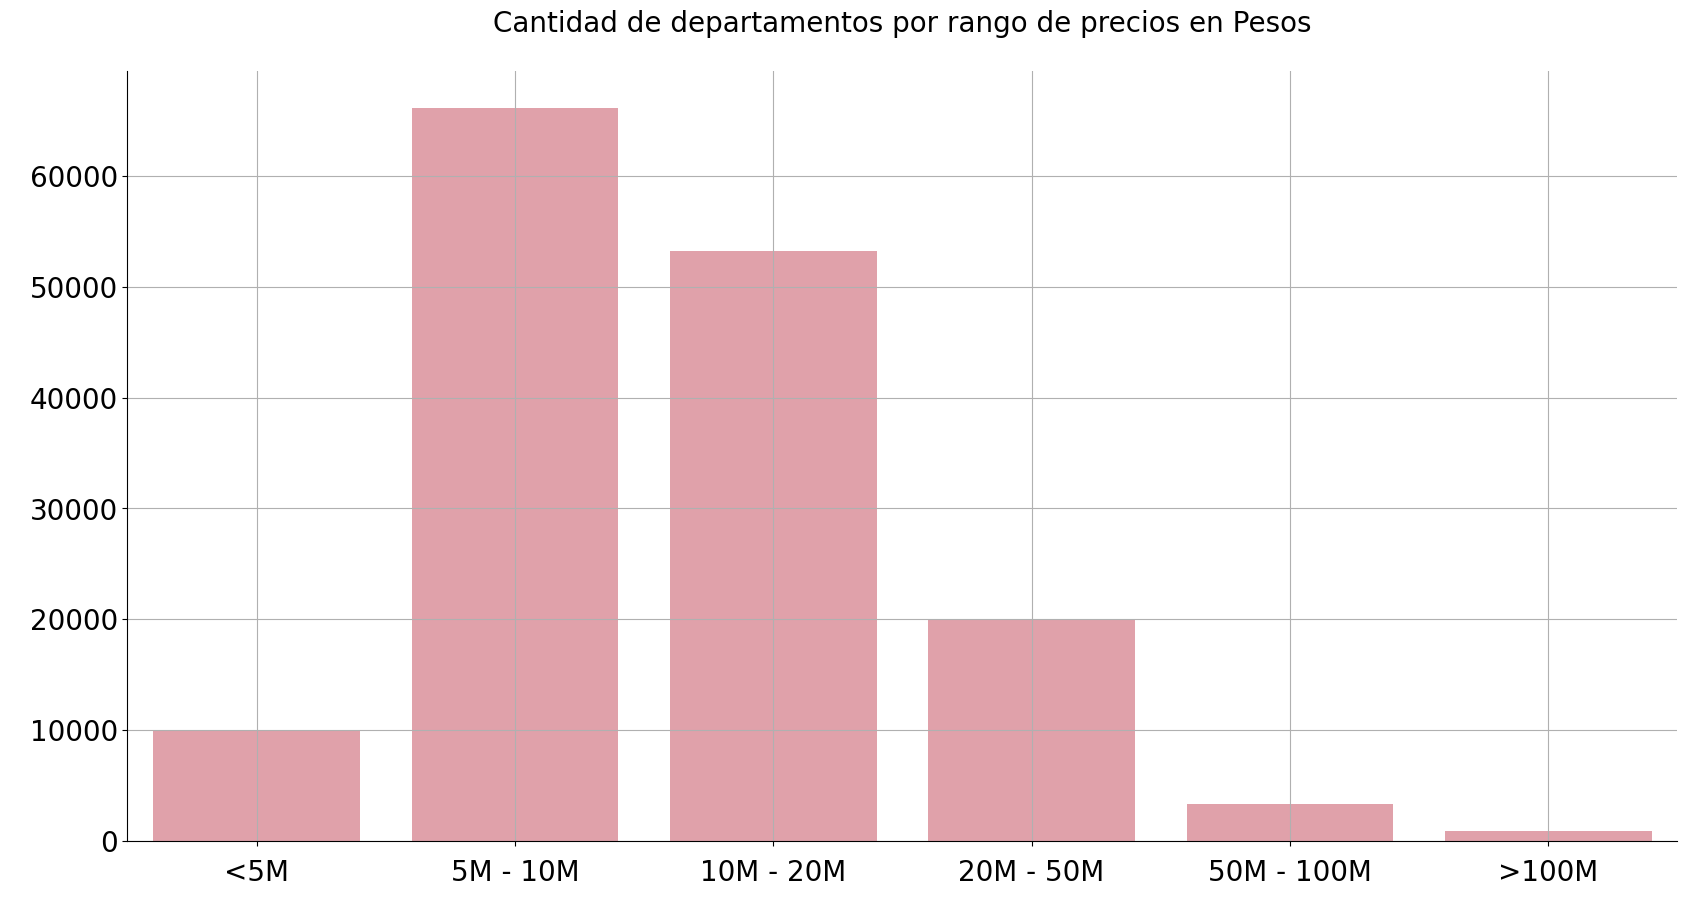

In [45]:
plt.figure(figsize=(20,10))
orden = ['<5M' ,'5M - 10M', '10M - 20M' , '20M - 50M', '50M - 100M', '>100M']
colores = ['#EA96A3']

sns.countplot(x='Rango_Pesos', data=data_intervalos, palette = colores,  order = orden)


plt.title('Cantidad de departamentos por rango de precios en Pesos', y=1.04, fontdict={'size':20})
plt.xlabel(' ')
plt.xticks(fontsize=20, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.grid()
plt.show()

## Observaciones:

- Hay aproximadamente 6.500 departamentos en venta con un precio entre 5M y 10M pesos
- Seguido de aproximadamente 5300 departamentos entre 10M y 20M de pesos

###  Dólares

In [46]:
len(data['Dolares'].unique())

9869

In [47]:
data_intervalos.loc[:, 'Rango_Dolares'] = '<50K'
data_intervalos.loc[(data['Dolares']>=50000) & (data_intervalos['Dolares'] < 75000), 'Rango_Dolares'] = '50K - 75K'
data_intervalos.loc[(data['Dolares']>=75000) & (data_intervalos['Dolares'] < 100000), 'Rango_Dolares'] = '75K - 100K'
data_intervalos.loc[(data['Dolares']>=100000) & (data_intervalos['Dolares'] < 250000), 'Rango_Dolares'] = '100K - 250K'
data_intervalos.loc[(data['Dolares']>=250000) & (data_intervalos['Dolares'] < 500000), 'Rango_Dolares'] = '250K - 500K'
data_intervalos.loc[(data['Dolares']>=500000) & (data_intervalos['Dolares'] < 1000000), 'Rango_Dolares'] = '500K - 1M'
data_intervalos.loc[(data['Dolares']>=1000000), 'Rango_Dolares'] = '>1M'

In [48]:
data_intervalos['Rango_Dolares'].value_counts()

100K - 250K    85672
250K - 500K    25419
75K - 100K     23784
50K - 75K       8664
500K - 1M       6719
>1M             2151
<50K            1073
Name: Rango_Dolares, dtype: int64

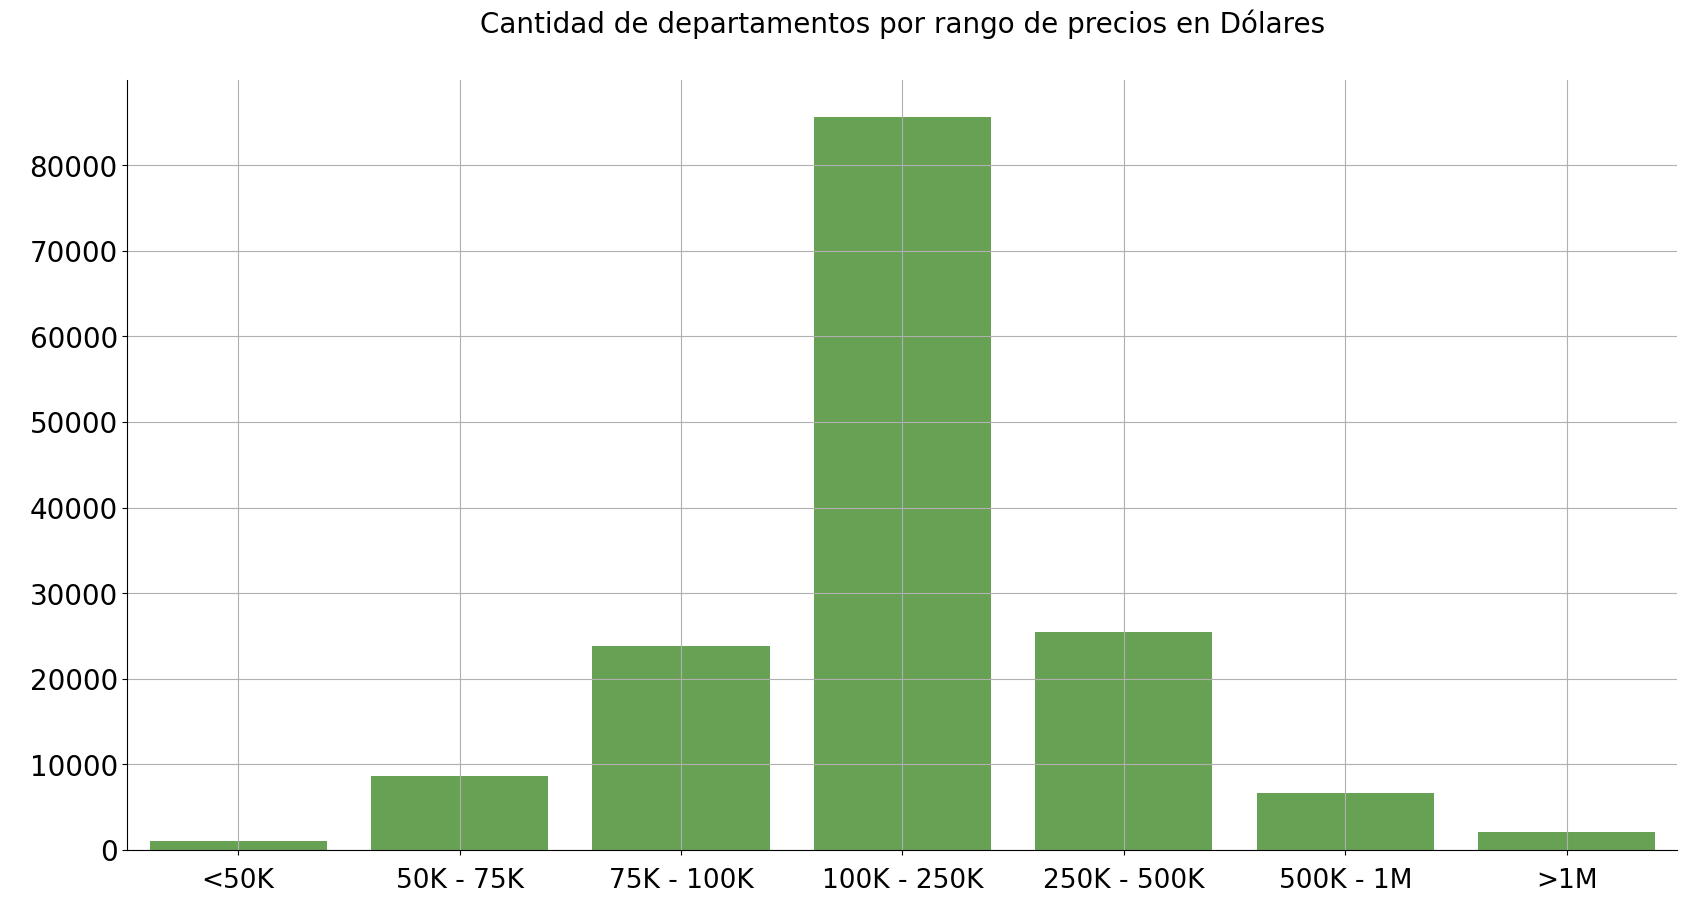

In [49]:
plt.figure(figsize=(20,10))
orden = ['<50K', '50K - 75K', '75K - 100K', '100K - 250K' ,  '250K - 500K' ,'500K - 1M', '>1M']
colores = ['#60AE47']

sns.countplot(x='Rango_Dolares', data=data_intervalos, palette=colores, order = orden)


plt.title('Cantidad de departamentos por rango de precios en Dólares', y=1.05, fontdict={'size':20})
plt.xlabel(' ')
plt.xticks(fontsize=19, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.grid()
plt.show()

## Observaciones:

- Hay una cantidad aproximada de 8500 propiedades con precios entre los 100K y 250K dolares.
- Le siguen unas 2300 a 2500 propiedades con valores entre los 75K y 100K dolares, y entre 250K y 500K dolares respectivamente

### **PesosM2**

In [50]:
len(data['PesosM2'].unique())

58341

In [51]:
data_intervalos.loc[:, 'Rango_PesosM2'] = '<50K'
data_intervalos.loc[(data_intervalos['PesosM2']>=50000) & (data_intervalos['PesosM2'] < 100000), 'Rango_PesosM2'] = '50K - 100K'
data_intervalos.loc[(data_intervalos['PesosM2']>=100000) & (data_intervalos['PesosM2'] < 150000), 'Rango_PesosM2'] = '100K - 150K'
data_intervalos.loc[(data_intervalos['PesosM2']>=150000) & (data_intervalos['PesosM2'] < 200000), 'Rango_PesosM2'] = '150K - 200K'
data_intervalos.loc[(data_intervalos['PesosM2']>=200000) & (data_intervalos['PesosM2'] < 500000), 'Rango_PesosM2'] = '200K - 500K'
data_intervalos.loc[(data_intervalos['PesosM2']> 500000), 'Rango_PesosM2'] = '>500K'

In [52]:
data_intervalos['Rango_PesosM2'].value_counts()

200K - 500K    58672
150K - 200K    55781
100K - 150K    32370
50K - 100K      5606
>500K            859
<50K             194
Name: Rango_PesosM2, dtype: int64

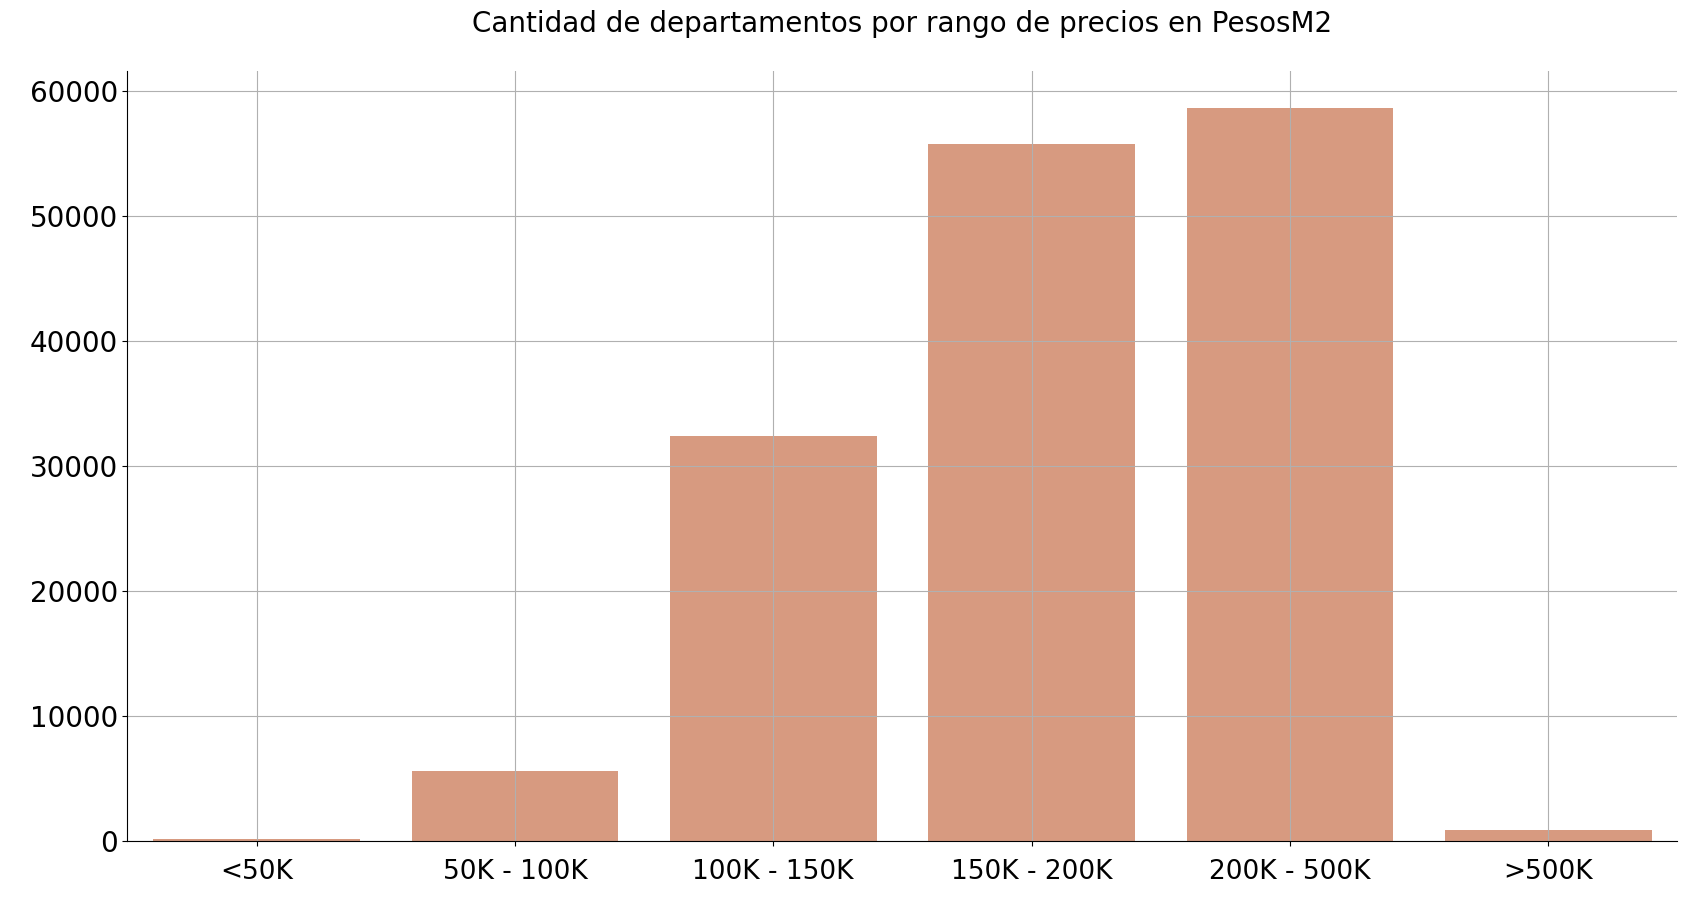

In [53]:
plt.figure(figsize=(20,10))
orden = ['<50K', '50K - 100K', '100K - 150K', '150K - 200K', '200K - 500K', '>500K']
colores = ['#E59471']

sns.countplot(x='Rango_PesosM2', data=data_intervalos,palette=colores, order = orden)

plt.title('Cantidad de departamentos por rango de precios en PesosM2', y=1.04, fontdict={'size':20})
plt.xlabel(' ')
plt.xticks(fontsize=19, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.grid()
plt.show()

## Observaciones:

- Hay una cantidad aproximada de 5.800 departamentos en venta de entre 200K y 500K pesos el m2
- Seguido por 5.300 propiedades con valores entre 150K y 200K pesos el m2

### **DolaresM2**

In [54]:
len(data['DolaresM2'].unique())

5817

In [55]:
data_intervalos.loc[:, 'Rango_DolaresM2'] = '<1K'
data_intervalos.loc[(data['DolaresM2']>=1000) & (data_intervalos['DolaresM2'] < 2500), 'Rango_DolaresM2'] = '1K - 2,5K'
data_intervalos.loc[(data['DolaresM2']>=2500) & (data_intervalos['DolaresM2'] < 5000), 'Rango_DolaresM2'] = '2,5K - 5K'
data_intervalos.loc[(data['DolaresM2']>=5000) & (data_intervalos['DolaresM2'] < 10000), 'Rango_DolaresM2'] = '5K - 10K'
data_intervalos.loc[data['DolaresM2']>=10000 , 'Rango_DolaresM2'] = '>10K'

In [56]:
data_intervalos['Rango_DolaresM2'].value_counts()

2,5K - 5K    90917
1K - 2,5K    55981
5K - 10K      5663
<1K            749
>10K           172
Name: Rango_DolaresM2, dtype: int64

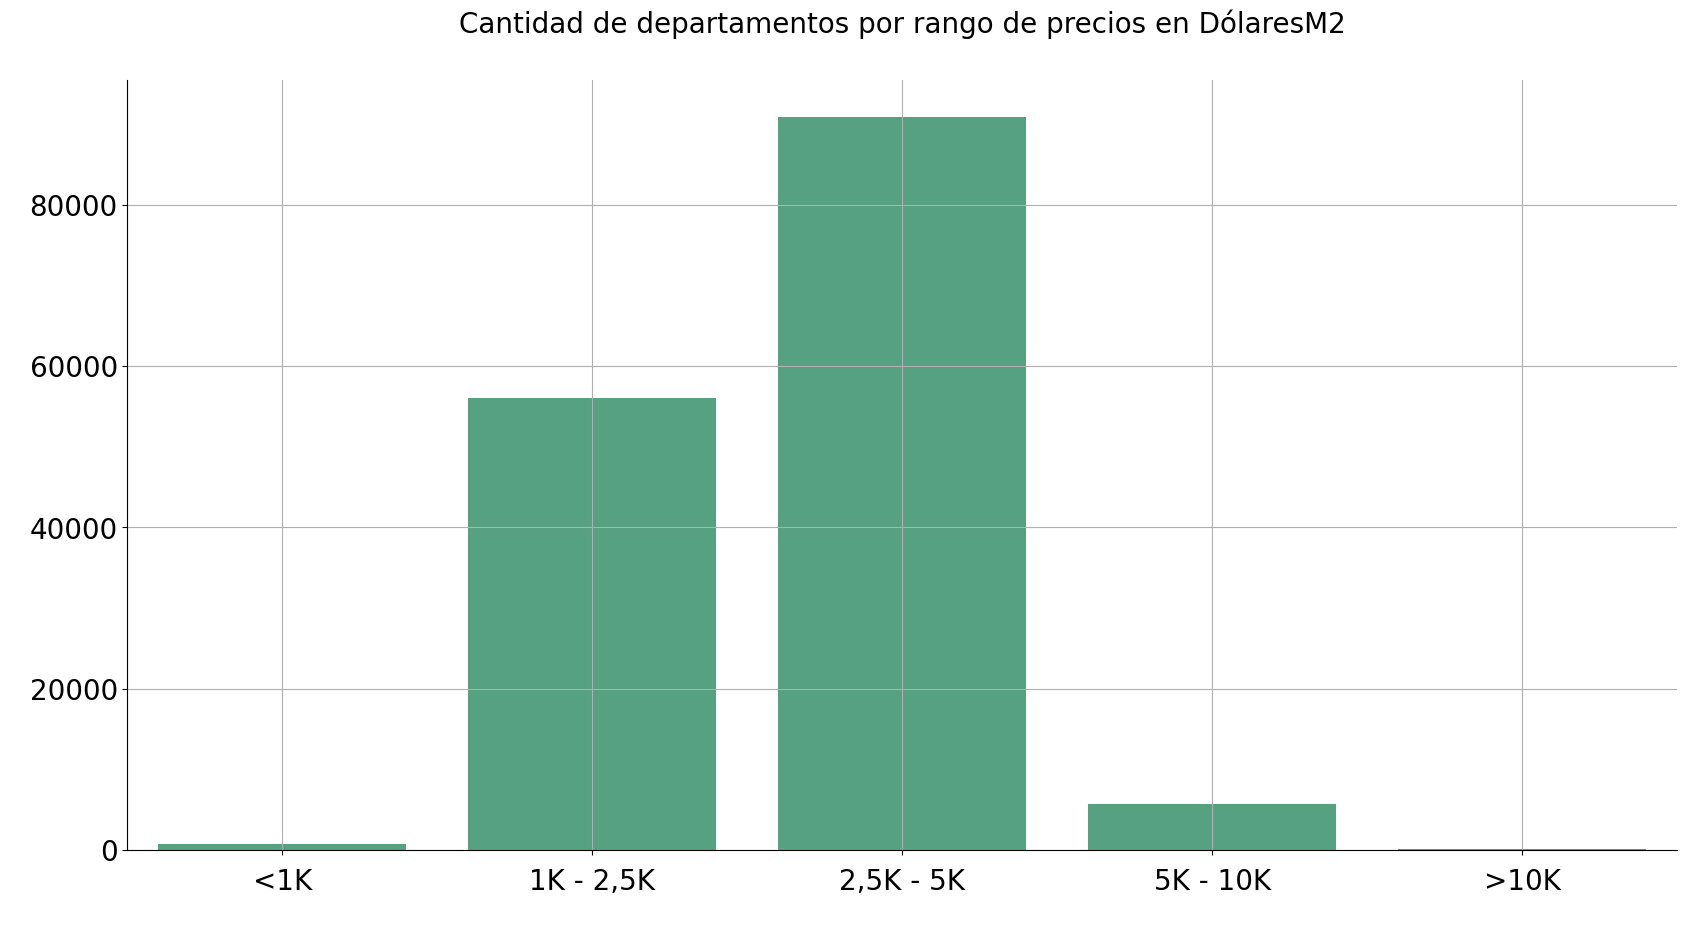

In [57]:
plt.figure(figsize=(20,10))
orden = ['<1K', '1K - 2,5K', '2,5K - 5K', '5K - 10K', '>10K']
colores = ['#49AE83']

sns.countplot(x='Rango_DolaresM2', data=data_intervalos, palette=colores, order = orden)


plt.title('Cantidad de departamentos por rango de precios en DólaresM2', y=1.05, fontdict={'size':20})
plt.xlabel(' ')
plt.xticks(fontsize=20, y=-0.01)
plt.ylabel(' ')
plt.yticks(fontsize=20)

sns.despine()
plt.grid()
plt.show()

## Observaciones:

- Hay aproximadamente 90.000 departamentos en venta con un valor de entre 2.5K y 5K dolares el m2
- Hay solamente 172 propiedades con un valor mayor a 10K dolares m2

## Exporto el dataset

In [72]:
ruta = 'C:/Users/Tamara/Documents/DATA ANALYTICS/Proyectos/Departamentos en Venta/departamentos-en-venta-2020-intervalos.csv'

data_intervalos.to_csv(ruta2, index=False)